## Parameters

**Exercise:** Use numpy's polyfit to fit polynomials to the following two data sets.

**Data Set 1:**

x = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0]<br>
y = [1.3, 1.2, 9.4, 27.3, 63.1, 126.5, 217.3, 341.5, 512.8, 729.3, 1001.8, 1332.7, 1728.9, 2198.8, 2743.7, 3376.7]<br>


**Data Set 2:**

x = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0]<br>
y = [5.7, 16.6, 58.0, 278.9, 1069.3, 3181.4, 7844.3, 16883.9, 32854.9, 59144.2, 100106.7, 161166.3, 248958.6]

### What are parameters?

Parameters are used in machine learning to develop an optimal model for a set of data.
They are determined (or at least, estimated) using the input data that we have available to us.

### What is numpy polyfit?

Polyfit is 'Polynomial fit' and is a numpy method used to determine parameters for a set of input data.<br>
It does this by using least squares to fit the data (see [polyfit documentation](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html)).

The user can specify the input data and try to find the original parameters by determining the degree (power) of $x$.

The basic syntax is of the form:<br>
numpy.polyfit(x, y, deg)

A polynomial of 1 degree is of the form:<br>
$y = mx + c$

A polynomial of 2 degrees is of the form:<br>
$y = ax^2 + bx +c$

As the input data is in the form of arrays numpy can be used.
Matplotlib can be used for the plots

In [2]:
# Import required libraries 
import numpy as np
import matplotlib.pyplot as plt

### Data Set 1: 

In [30]:
# Set the data to x and y that we can then plot
x = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0]
y = [1.3, 1.2, 9.4, 27.3, 63.1, 126.5, 217.3, 341.5, 512.8, 729.3, 1001.8, 1332.7, 1728.9, 2198.8, 2743.7, 3376.7]

# NB had to convert to integers as was throwing an error when plotting. 
# Need to try to fix this.
int_x = np.int_(x)
print(int_x)

# Check lengths of both arrays, make sure they're the same length
length_x = len(x)
length_y = len(y)
print(f'The length of x is: {length_x}')
print(f'The length of y is {length_y}')

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
The length of x is: 16
The length of y is 16


As we have both x and y, we can now plot the data to see what it looks like

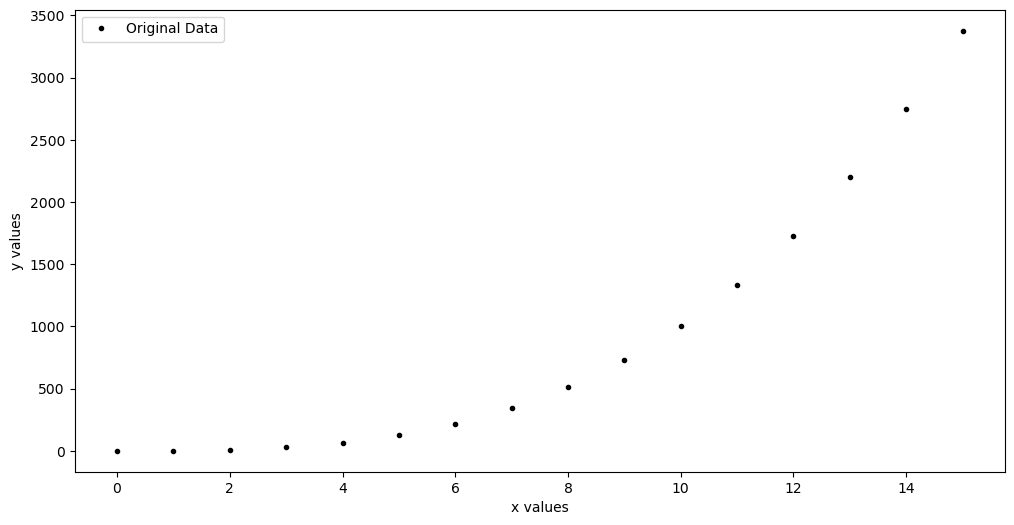

In [33]:
# Create a plot.
fig, ax = plt.subplots(figsize=(12,6))
# Plot labels
ax.set_xlabel('x values')
ax.set_ylabel('y values')

# Plot x vs y (data set 1).
ax.plot(x, y, 'k.', label='Original Data')
ax.legend()

From looking at the plot, it's not a straight line - as there's one visible turning point, we can start with a power of 2 in numpy polyfit.
Now we can use the x and y data to try and find the original paramters:

In [109]:
# Use x and y from dataset 1
params = np.polyfit(x, y, 2)
print(params)
print(params[0])
print(params[1])
print(params[2])

[  22.51017157 -130.81095588  137.31262255]
22.51017156862745
-130.81095588235286
137.31262254901947


So the output is a numpy array that contains the parameters of the polynomial function.
We can use the [numpy's poly1d method](https://numpy.org/doc/stable/reference/generated/numpy.poly1d.html#numpy.poly1d) to put the parameters into a polynomial equation for us:

In [15]:
# Define the polynomial, poly, using the parameters determined from polyfit.
poly = np.poly1d(params)

# Print the polynomial
print(poly)

       2
22.51 x - 130.8 x + 137.3


So, as a second-order polynomial is:<br>
$y = ax^2 + bx +c$<br>
$a = 22.51$<br>
$b = -130.8$<br>
$c = 137.3$<br>


The output data for the fitted curve is: 
[ 137.31262255  290.63375     488.97522059  732.33703431 1020.71919118
 1354.12169118 1732.54453431 2155.98772059 2624.45125    3137.93512255
 3696.43933824 4299.96389706 4948.50879902 5642.07404412 6380.65963235
 7164.26556373]


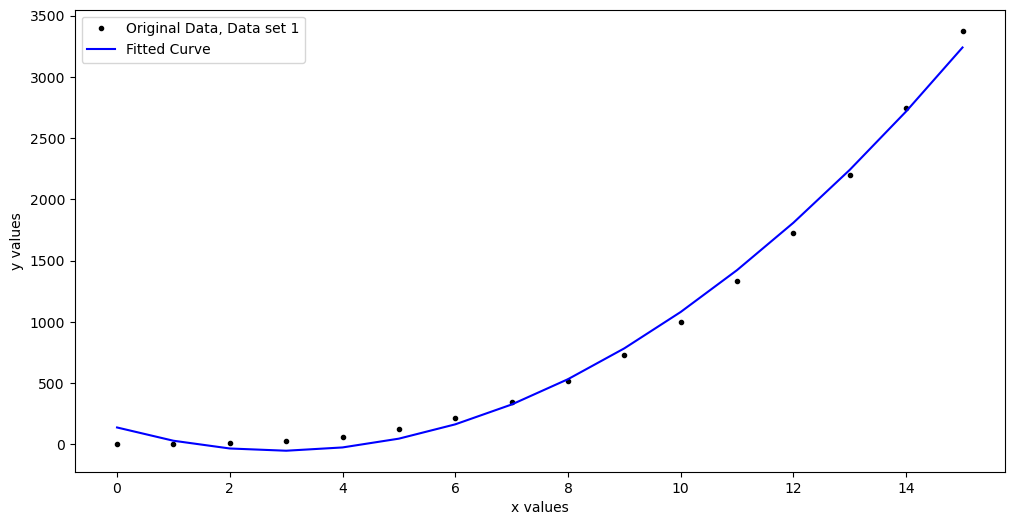

In [111]:
# Create a plot.
fig, ax = plt.subplots(figsize=(12,6))
# Plot labels
ax.set_xlabel('x values')
ax.set_ylabel('y values')

# Plot x vs y (data set 1).
ax.plot(x, y,'k.', label='Original Data, Data set 1')

# Determine line of best fit
#yfinal = (22.5 * int_x**2 - 130.8 * int_x + 137.3)
yfinal = (params[0] * int_x**2 - params[1] * int_x + params[2])

# Plot x vs parameters on x - integers are able to plot, need to fix.
#ax.plot(x, params[0] * (x**2) + params[1]*x + params[2], 'r-')
ax.plot(params[0] * int_x**2 + params[1] * int_x + params[2], 'b-', label='Fitted Curve')
ax.legend()
#x.plot(x, yfinal)
print(f'The output data for the fitted curve is: \n{yfinal}')

So polyfit has been used to fit a curve to the input data from data set 1

### Data set 2:

In [57]:
# Set the data to x1 and y1 that we can then plot
x1 = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0]
y1 = [5.7, 16.6, 58.0, 278.9, 1069.3, 3181.4, 7844.3, 16883.9, 32854.9, 59144.2, 100106.7, 161166.3, 248958.6]
#x1 = np.array(x1)
x1
int_x1 = np.int_(x)
print(int_x1)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


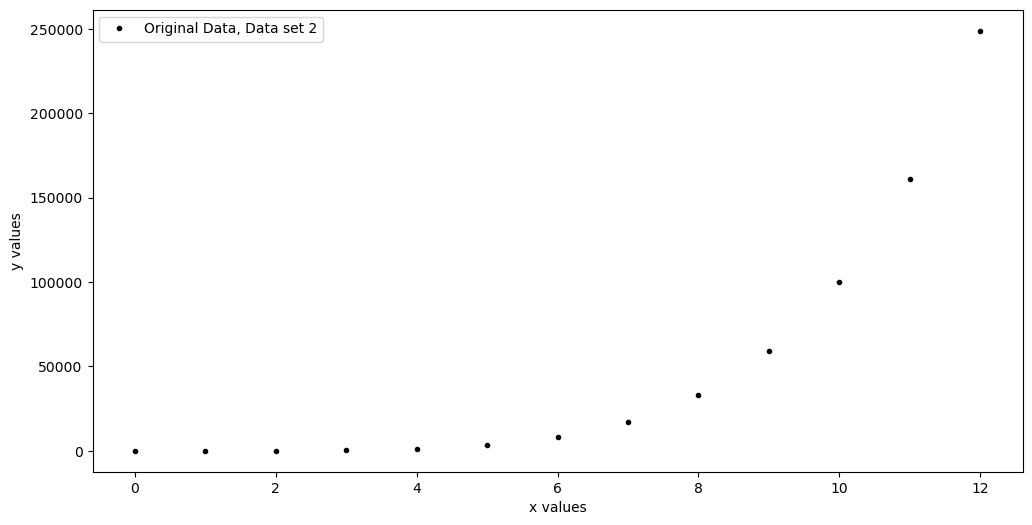

In [58]:
# Create a plot.
fig, ax = plt.subplots(figsize=(12,6))
# Plot labels
ax.set_xlabel('x values')
ax.set_ylabel('y values')

# Plot x1 vs y1.
ax.plot(x1, y1, 'k.',label='Original Data, Data set 2')
ax.legend()

The data shows that the output has another turning point - it looks like $e^x$ because the y values are increasing so much for every increase in x.<br>
However, for now, regard as a polynomial equation - calculate for second and third-degree polynomials (this is my bias!).<br>

Using the values for x and y from the second dataset, we can determine the parameters for the line of best fit.

In [64]:
params_set2 = np.polyfit(x1, y1, 2)
print(f'Parameters of second-degree polynomial: \n{params_set2}')

params_set3 = np.polyfit(x1, y1, 3)
print(f'\nParameters of third-degree polynomial: \n{params_set3}')

Parameters of second-degree polynomial: 
[  3218.5461039  -22394.36478521  22021.0989011 ]

Parameters of third-degree polynomial: 
[  404.99944639 -4071.44393107 11220.5892649  -4708.86456044]


In [65]:
# Now define the polynomials:
# Define the polynomial, poly, using the parameters determined from polyfit.
poly2 = np.poly1d(params_set2)
poly3 = np.poly1d(params_set3)
# Print the polynomial
print(f'The second-degree polynomial equation is: \n{poly2}')
print(f'\nThe third-degree polynomial equation is: \n{poly3}')

The second-degree polynomial equation is: 
      2
3219 x - 2.239e+04 x + 2.202e+04

The third-degree polynomial equation is: 
     3        2
405 x - 4071 x + 1.122e+04 x - 4709


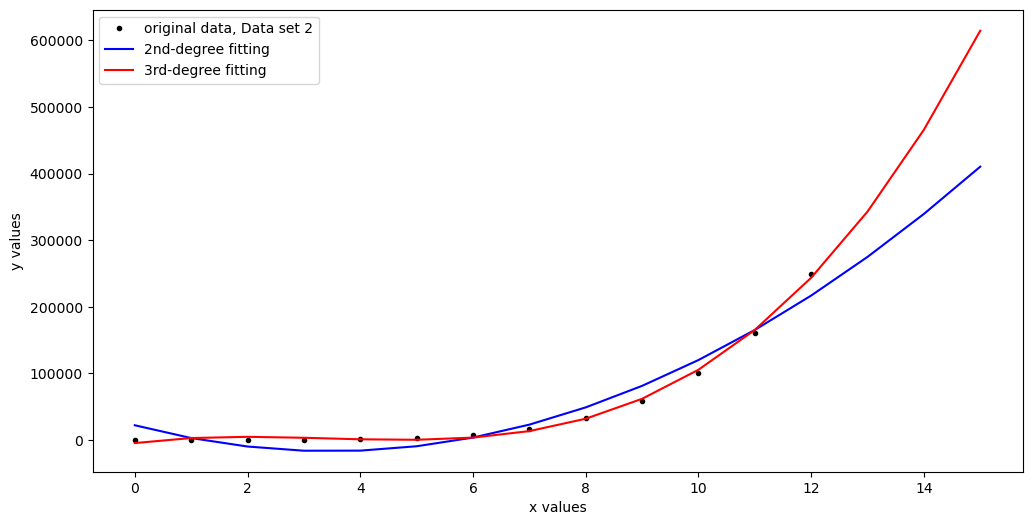

In [119]:
# Create a plot.
fig, ax = plt.subplots(figsize=(12,6))
# Plot labels
ax.set_xlabel('x values')
ax.set_ylabel('y values')

# Plot x vs y.
ax.plot(x1, y1, 'k.', label='original data, Data set 2')

# Second-degree polynomial
ax.plot(params_set2[0] * int_x1**2 + params_set2[1] * int_x1 + params_set2[2], 'b-', label='2nd-degree fitting')

# Third-degree polynomial
ax.plot(params_set3[0] * int_x1**3 + params_set3[1] * int_x1**2 + params_set3[2] * int_x1 + params_set3[3], 'r-', label='3rd-degree fitting')
# Plot labels of curves and original data
ax.legend()

Using a second-degree polynomial to approximate the data works well, however, a third-degree polynomial works best, as can be seen from the red line above.

Lets try using polyfit to fit an exponential function, of the form:<br>
$y$ = $ae$<sup>$bx$</sup> + $c$ <br>

In [52]:
# Python implementation of above:
# y1 = a * np.exp(b * x) + c

# Polyfit
poly1 = np.polyfit(x1, np.log(y1), 1)
poly1

array([0.90338171, 2.6796694 ])

In [53]:
a = poly1[0]
b = poly1[1]
print(a)
print(b)

0.903381706474993
2.6796694024873395


In [100]:
p_exp = np.poly1d(poly1)
print(p_exp)

 
0.9034 x + 2.68


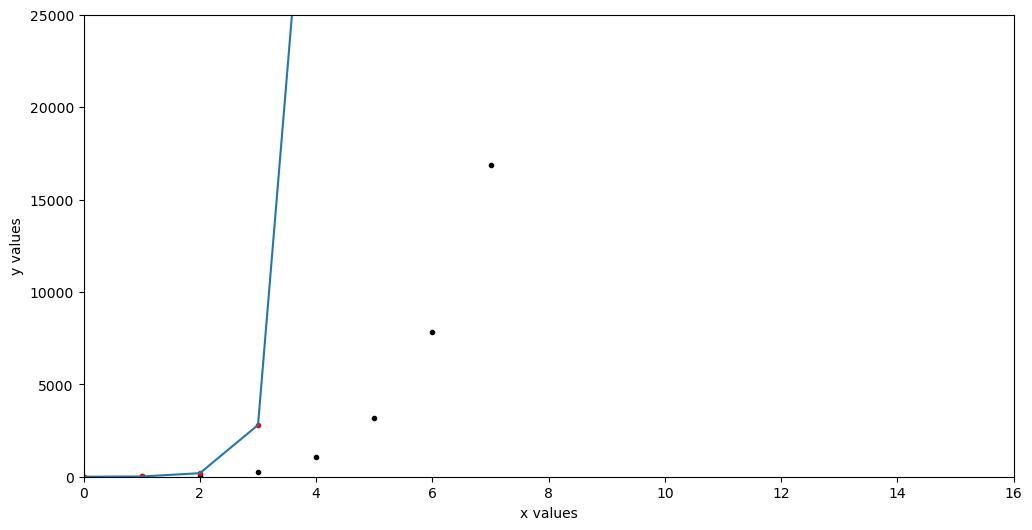

In [123]:
# Create a plot.
fig, ax = plt.subplots(figsize=(12,6))
# Plot labels
ax.set_xlabel('x values')
ax.set_ylabel('y values')
# Set limits
ax.set_ylim(0, 25000)
ax.set_xlim(0, 16)

# Plot x vs y.
ax.plot(x1, y1, 'k.', label='Original Data, Data set 1')

ax.plot(a * np.exp(b * int_x1), 'r.')
y_final = a * np.exp(b * int_x1)
ax.plot(int_x1, y_final)

x_fitted = np.linspace(np.min(x1), np.max(x1), 12)
#y_fitted = poly1[0] * np.exp(poly1[1] * x_fitted)



### Conclusion

It's been shown that through the use of numpy's polyfit and poly1d, a line of best fit can be generated to approximate the input data.

The first data set was fairly straightforward, whereas from plotting the data in the second data set, the decision was taken to generate a third degree polynomial equation.

As the second data set looked like an exponentional function, I tried to use polyfit to generate a line of best fit - however, all it proved was that the third-order polynomial worked best.

### References

1. [Ian's notebook on parameters](https://github.com/ianmcloughlin/2223-S1-machine-learn-stats/blob/main/notebooks/03-parameters.ipynb)
2. [Numpy polyfit documentation](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html)
3. [numpy's poly1d method](https://numpy.org/doc/stable/reference/generated/numpy.poly1d.html#numpy.poly1d)